# Lung Disease Prediction Model Comparison

This notebook aims to explore, preprocess, and model a dataset to predict the likelihood of getting Lung Cancer. We will compare multiple algorithms to find the best performer based on accuracy, precision, recall, and F1 score.
The dataset used in this notebook is from Kaggle and can be found [here](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer).

## Introduction

Lung cancer is the leading cause of cancer-related deaths worldwide, with a high mortality rate due to late-stage diagnosis. Early detection and treatment are crucial for improving survival rates and reducing the burden of the disease. Machine learning models can help predict the likelihood of lung cancer based on various risk factors and symptoms, enabling early intervention and personalised treatment plans. In this notebook, we will explore a dataset containing information about individuals' age

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler



## Data Loading

In [2]:
# Load the dataset
file_path = '../Datasets/LungCancer.csv'
LungCancerData = pd.read_csv(file_path)
LungCancerData.head()



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Data Exploration

In [3]:
# Initialize a dictionary to hold unique values for each column
unique_values = {}

# Iterate over each column in the DataFrame
for column in LungCancerData.columns:
    # Store the unique values of the column in the dictionary
    unique_values[column] = LungCancerData[column].unique()

# Optionally, you can print the unique values for each column
for column, values in unique_values.items():
    print(f"Column: {column}, Unique Values: {values}")


Column: GENDER, Unique Values: ['M' 'F']
Column: AGE, Unique Values: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Column: SMOKING, Unique Values: [1 2]
Column: YELLOW_FINGERS, Unique Values: [2 1]
Column: ANXIETY, Unique Values: [2 1]
Column: PEER_PRESSURE, Unique Values: [1 2]
Column: CHRONIC DISEASE, Unique Values: [1 2]
Column: FATIGUE , Unique Values: [2 1]
Column: ALLERGY , Unique Values: [1 2]
Column: WHEEZING, Unique Values: [2 1]
Column: ALCOHOL CONSUMING, Unique Values: [2 1]
Column: COUGHING, Unique Values: [2 1]
Column: SHORTNESS OF BREATH, Unique Values: [2 1]
Column: SWALLOWING DIFFICULTY, Unique Values: [2 1]
Column: CHEST PAIN, Unique Values: [2 1]
Column: LUNG_CANCER, Unique Values: ['YES' 'NO']


In [4]:
#Checking the shape of the dataset
LungCancerData.shape

(309, 16)

In [5]:
#Checking the first 5 rows of the dataset
print(LungCancerData.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [6]:
#Basic information about the dataset
LungCancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
#Summary statistics of the dataset
LungCancerData.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [8]:
#Checking for unique values in the dataset
LungCancerData.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [9]:
#Checking Data Types
LungCancerData.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [10]:
#Checking for missing values
LungCancerData.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Data Visualization

In [11]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

#### Initial Data Exploration

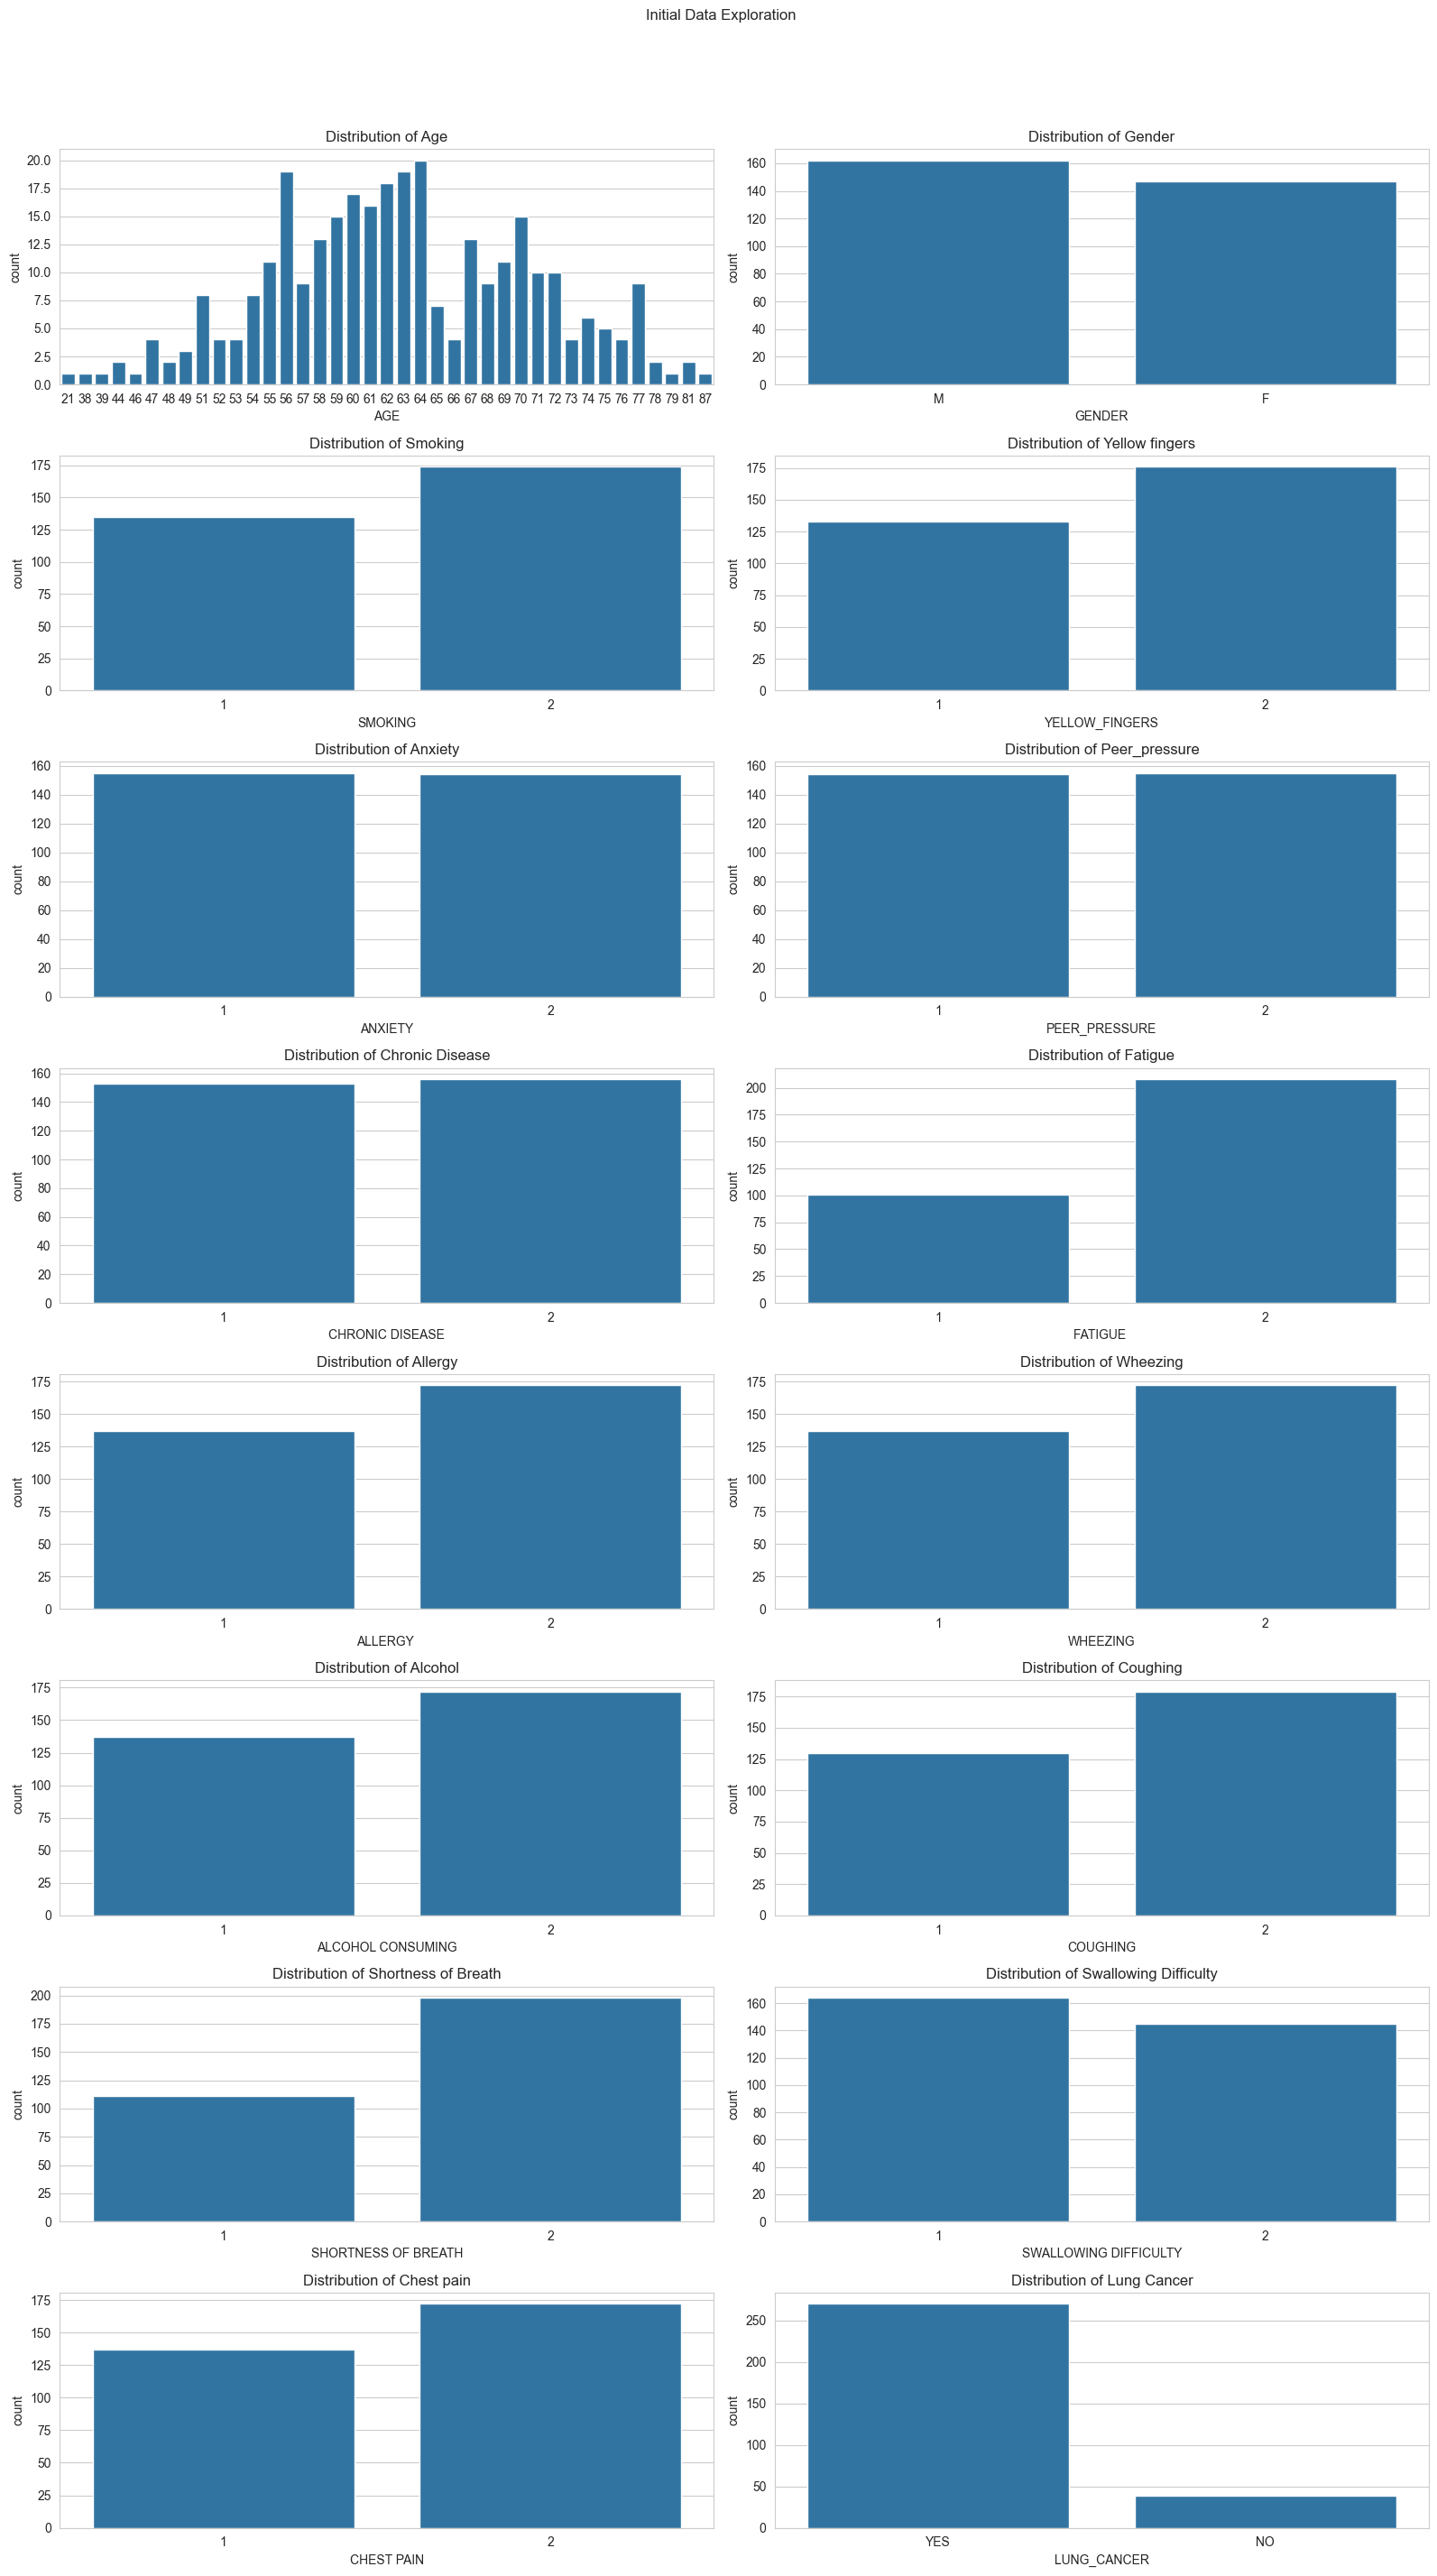

In [12]:


# Prepare the figure layout
fig, axes = plt.subplots(8, 2, figsize=(16, 30))
fig.suptitle('Initial Data Exploration')

# Distribution of Age
sns.countplot(x='AGE', data=LungCancerData, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Distribution of Gender
sns.countplot(x='GENDER', data=LungCancerData, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Gender')

# Distribution of Smoking
sns.countplot(x='SMOKING', data=LungCancerData, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Smoking')

# Distribution of Yellow fingers
sns.countplot(x='YELLOW_FINGERS', data=LungCancerData, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Yellow fingers')

# Distribution of Anxiety
sns.countplot(x='ANXIETY', data=LungCancerData, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Anxiety')

# Distribution of Peer_pressure
sns.countplot(x='PEER_PRESSURE', data=LungCancerData, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Peer_pressure')

# Distribution of Chronic Disease
sns.countplot(x='CHRONIC DISEASE', data=LungCancerData, ax=axes[3, 0])
axes[3, 0].set_title('Distribution of Chronic Disease')

# Distribution of Fatigue
sns.countplot(x='FATIGUE ', data=LungCancerData, ax=axes[3, 1])
axes[3, 1].set_title('Distribution of Fatigue')

# Distribution of Allergy
sns.countplot(x='ALLERGY ', data=LungCancerData, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of Allergy')

# Distribution of Wheezing
sns.countplot(x='WHEEZING', data=LungCancerData, ax=axes[4, 1])
axes[4, 1].set_title('Distribution of Wheezing')

# Distribution of Alcohol
sns.countplot(x='ALCOHOL CONSUMING', data=LungCancerData, ax=axes[5, 0])
axes[5, 0].set_title('Distribution of Alcohol')

# Distribution of Coughing
sns.countplot(x='COUGHING', data=LungCancerData, ax=axes[5, 1])
axes[5, 1].set_title('Distribution of Coughing')

# Distribution of Shortness of Breath
sns.countplot(x='SHORTNESS OF BREATH', data=LungCancerData, ax=axes[6, 0])
axes[6, 0].set_title('Distribution of Shortness of Breath')

# Distribution of Swallowing Difficulty
sns.countplot(x='SWALLOWING DIFFICULTY', data=LungCancerData, ax=axes[6, 1])
axes[6, 1].set_title('Distribution of Swallowing Difficulty')

# Distribution of Chest pain
sns.countplot(x='CHEST PAIN', data=LungCancerData, ax=axes[7, 0])
axes[7, 0].set_title('Distribution of Chest pain')

# Distribution of Lung Cancer
sns.countplot(x='LUNG_CANCER', data=LungCancerData, ax=axes[7, 1])
axes[7, 1].set_title('Distribution of Lung Cancer')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## About the Dataset

### Attribute Information

Total no. of attributes: 16
No .of instances: 284

* Gender: M(Male), F(Female)
* Age: Age of the patient
* Smoking: YES=2 , NO=1.
* Yellow fingers: YES=2 , NO=1.
* Anxiety: YES=2 , NO=1.
* Peer_pressure: YES=2 , NO=1.
* Chronic Disease: YES=2 , NO=1.
* Fatigue: YES=2 , NO=1.
* Allergy: YES=2 , NO=1.
* Wheezing: YES=2 , NO=1.
* Alcohol: YES=2 , NO=1.
* Coughing: YES=2 , NO=1.
* Shortness of Breath: YES=2 , NO=1.
* Swallowing Difficulty: YES=2 , NO=1.
* Chest pain: YES=2 , NO=1.
* Lung Cancer: YES , NO.

## Data Preprocessing

### Handling Missing Values

No Missing Data

###

### Handling Outliers

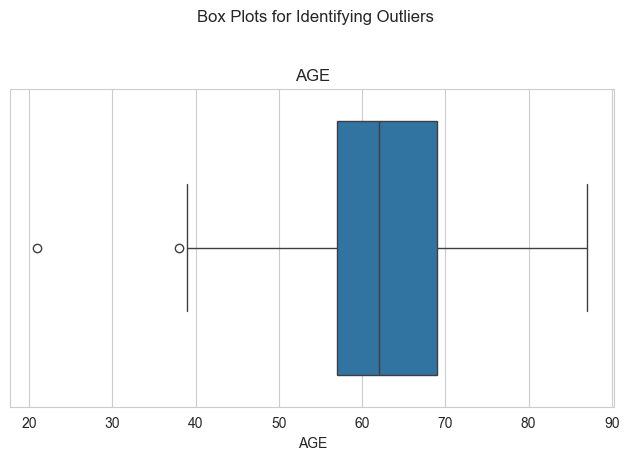

In [13]:
# Prepare the figure layout
fig, ax = plt.subplots()
fig.suptitle('Box Plots for Identifying Outliers')

# Box plot for Age
sns.boxplot(x=LungCancerData['AGE'], ax=ax)
ax.set_title('AGE')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [14]:
def remove_outliers(df, column):
    if column not in df.columns:
        print(f"The column '{column}' does not exist in the DataFrame.")
        return df

    if not np.issubdtype(df[column].dtype, np.number):
        print(f"The column '{column}' is not of numeric data type.")
        return df

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    df_out = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_out



In [15]:
# Remove outliers from the 'AGE' column
LungCancerData = remove_outliers(LungCancerData, 'AGE')

### Encoding and Scaling Categorical Variables

In [16]:
# One-hot encoding for categorical variables
categorical_columns = ['GENDER','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ' ,'ALLERGY ','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER']

In [17]:
# Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    LungCancerData[column] = label_encoder.fit_transform(LungCancerData[column])

#    
scaler=StandardScaler()
LungCancerData['AGE']=scaler.fit_transform(LungCancerData[['AGE']])

# Display the updated DataFrame after imputation and encoding
LungCancerData.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.789275,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1.435084,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,-0.502342,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.014305,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.014305,0,1,0,0,0,0,0,1,0,1,1,0,0,0


<Axes: >

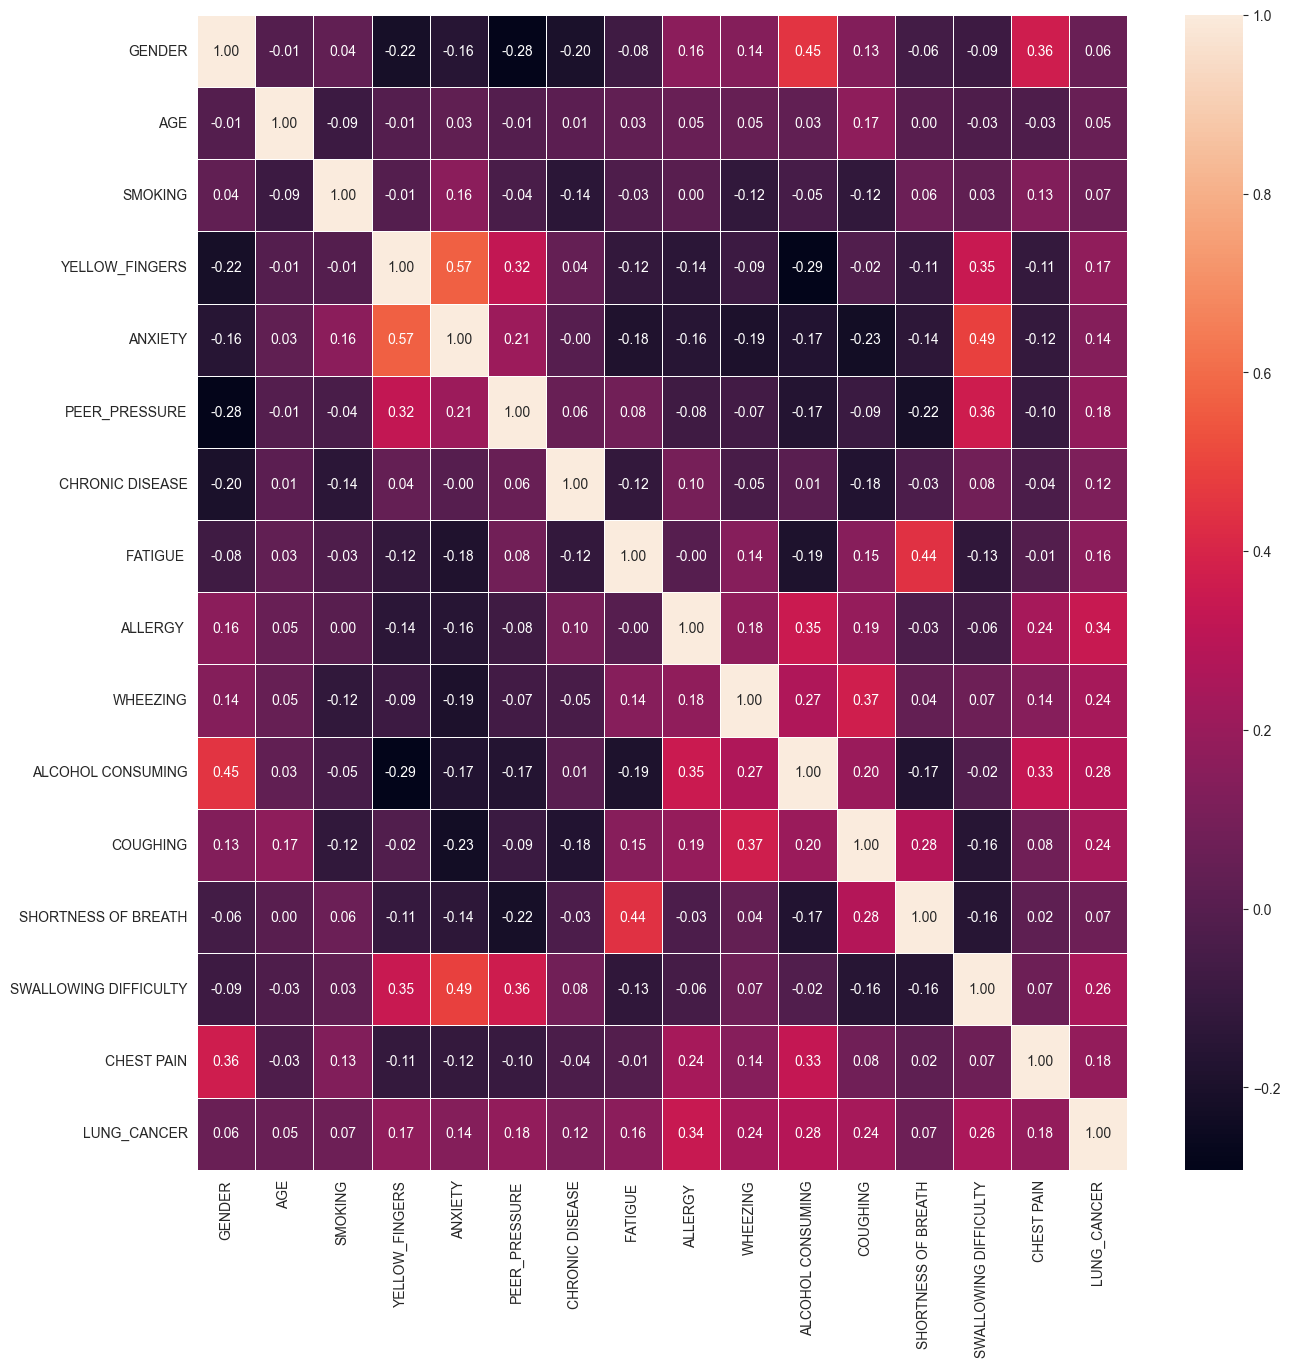

In [18]:
# Check the correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(LungCancerData.corr(),annot=True,linewidth=0.5,fmt='0.2f')

In [19]:
# Define your features and target variable
X = LungCancerData.drop(['LUNG_CANCER'], axis=1)  # Dropping 'id' as it's not a relevant feature
y = LungCancerData['LUNG_CANCER']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
242,1,1.847283,1,1,1,0,1,0,1,1,0,0,0,1,1
144,1,0.140408,0,1,1,1,0,0,1,0,1,0,0,1,1
255,0,1.847283,0,0,0,1,1,1,0,0,1,1,1,1,0
77,1,-0.909976,1,0,0,0,0,1,1,1,1,1,1,0,1
114,0,1.190793,0,1,0,0,0,1,0,1,1,1,1,0,0


In [21]:
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (245, 15)
Test shape: (62, 15)


In [22]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC Score: {roc_auc}")
    print(f"Cross-validation Score: {cv_score}")
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

## Model Building

### Logistic Regression

Logistic Regression:
Accuracy: 0.9193548387096774
Precision: 0.9482758620689655
Recall: 0.9649122807017544
F1 Score: 0.9565217391304347
ROC-AUC Score: 0.6824561403508772
Cross-validation Score: 0.9224489795918368


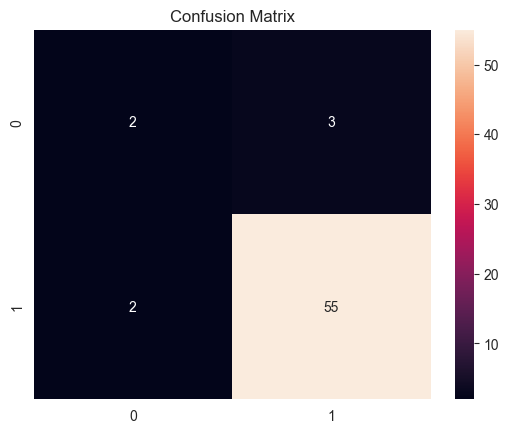

In [23]:
print("Logistic Regression:")
lr = LogisticRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

### Decision Tree

Decision Trees:
Accuracy: 0.9193548387096774
Precision: 0.9482758620689655
Recall: 0.9649122807017544
F1 Score: 0.9565217391304347
ROC-AUC Score: 0.6824561403508772
Cross-validation Score: 0.8693877551020408


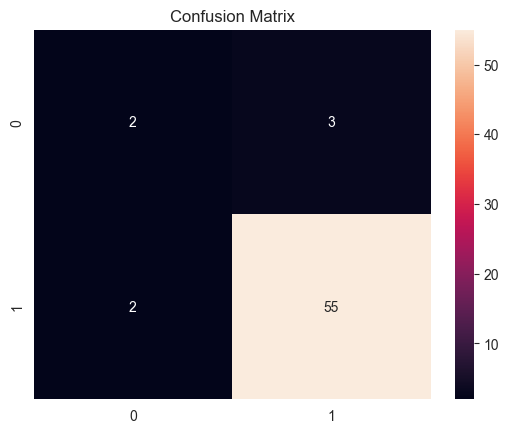

In [24]:
print("Decision Trees:")
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train, y_train, X_test, y_test)

### Random Forest

Random Forest:
Accuracy: 0.9193548387096774
Precision: 0.9482758620689655
Recall: 0.9649122807017544
F1 Score: 0.9565217391304347
ROC-AUC Score: 0.6824561403508772
Cross-validation Score: 0.9102040816326531


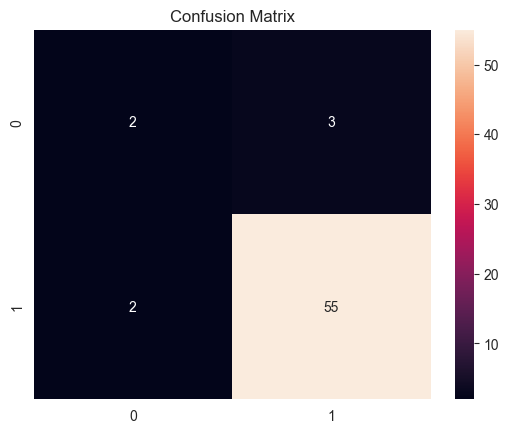

In [25]:
print("Random Forest:")
rf = RandomForestClassifier()
evaluate_model(rf, X_train, y_train, X_test, y_test)

### Support Vector Machine (SVM)

Support Vector Machines:
Accuracy: 0.9032258064516129
Precision: 0.9322033898305084
Recall: 0.9649122807017544
F1 Score: 0.9482758620689654
ROC-AUC Score: 0.5824561403508772
Cross-validation Score: 0.9020408163265307


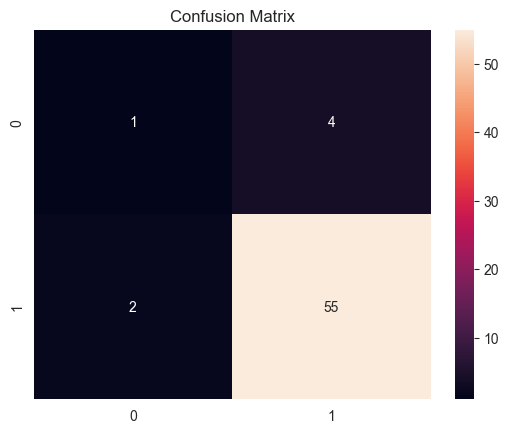

In [26]:
print("Support Vector Machines:")
svc = SVC()
evaluate_model(svc, X_train, y_train, X_test, y_test)

### k-Nearest Neighbors (k-NN)

k-Nearest Neighbors:
Accuracy: 0.9032258064516129
Precision: 0.9322033898305084
Recall: 0.9649122807017544
F1 Score: 0.9482758620689654
ROC-AUC Score: 0.5824561403508772
Cross-validation Score: 0.889795918367347


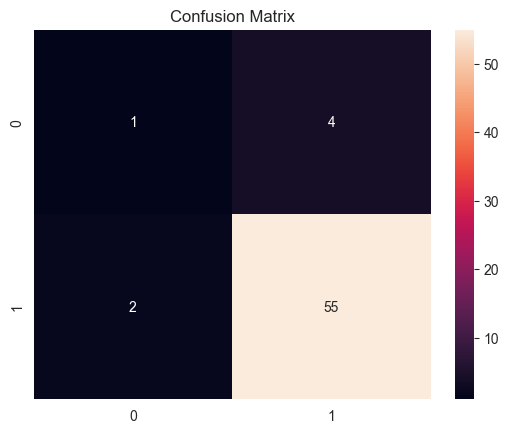

In [27]:
print("k-Nearest Neighbors:")
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, y_train, X_test, y_test)

### Naive Bayes (GaussianNB)

Naive Bayes:
Accuracy: 0.9193548387096774
Precision: 0.9482758620689655
Recall: 0.9649122807017544
F1 Score: 0.9565217391304347
ROC-AUC Score: 0.6824561403508772
Cross-validation Score: 0.8979591836734695


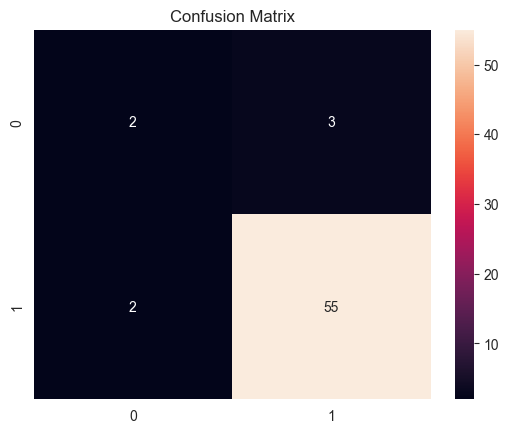

In [28]:
print("Naive Bayes:")
nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test)

### Splitting the Data and Applying SMOTE

In [29]:


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X, y)

# Verify the class distribution after applying SMOTE
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (538, 15)
After OverSampling, the shape of train_y: (538,) 

After OverSampling, counts of label '1': 269
After OverSampling, counts of label '0': 269


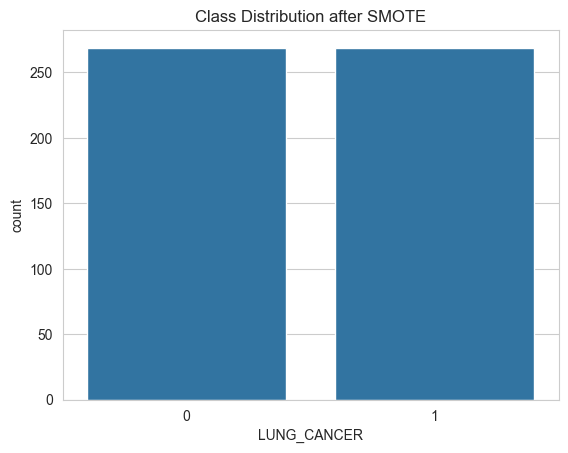

In [30]:
# Convert the resampled target data to a DataFrame for easier plotting
y_train_res_df = pd.DataFrame(y_train_res, columns=['LUNG_CANCER']) 

# Plot the distribution of the target variable after SMOTE
sns.countplot(x='LUNG_CANCER', data=y_train_res_df)
plt.title('Class Distribution after SMOTE')
plt.show()

## Model Building with Smote Data


### Logistic Regression

Logistic Regression:
Accuracy: 0.9516129032258065
Precision: 0.9821428571428571
Recall: 0.9649122807017544
F1 Score: 0.9734513274336283
ROC-AUC Score: 0.8824561403508772
Cross-validation Score: 0.9461232260297681


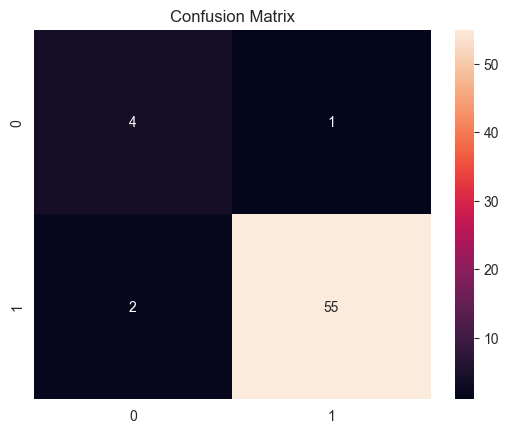

In [31]:
print("Logistic Regression:")
lr = LogisticRegression()
evaluate_model(lr, X_train_res, y_train_res, X_test, y_test)

### Decision Tree

Decision Trees:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0
Cross-validation Score: 0.9349775008653513


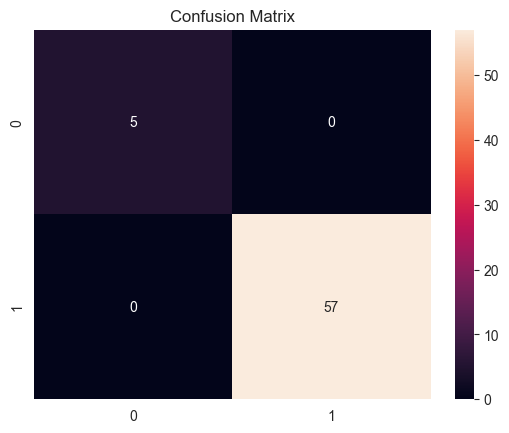

In [32]:
print("Decision Trees:")
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train_res, y_train_res, X_test, y_test)

### Random Forest

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0
Cross-validation Score: 0.9535479404638284


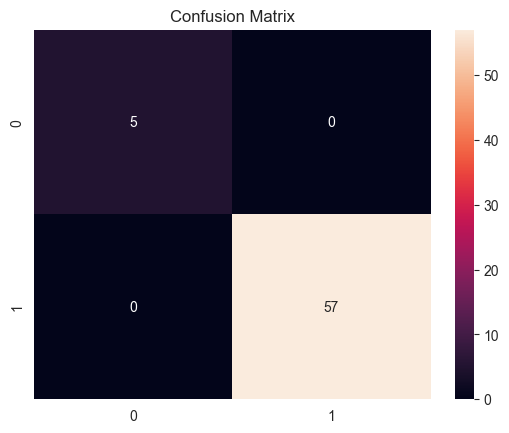

In [33]:
print("Random Forest:")
rf = RandomForestClassifier()
evaluate_model(rf, X_train_res, y_train_res, X_test, y_test)

### Support Vector Machine (SVM)

Support Vector Machines:
Accuracy: 0.9516129032258065
Precision: 1.0
Recall: 0.9473684210526315
F1 Score: 0.972972972972973
ROC-AUC Score: 0.9736842105263157
Cross-validation Score: 0.9572862582208378


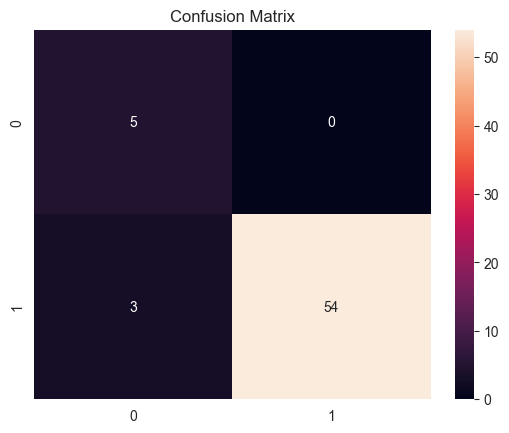

In [34]:
print("Support Vector Machines:")
svc = SVC()
evaluate_model(svc, X_train_res, y_train_res, X_test, y_test)

### k-Nearest Neighbors (k-NN)

k-Nearest Neighbors:
Accuracy: 0.9193548387096774
Precision: 0.9814814814814815
Recall: 0.9298245614035088
F1 Score: 0.954954954954955
ROC-AUC Score: 0.8649122807017544
Cross-validation Score: 0.9368120456905503


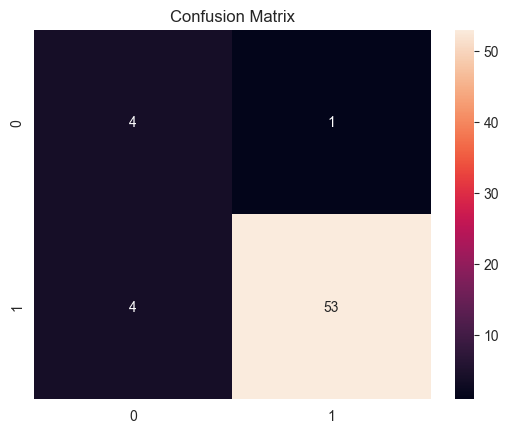

In [35]:
print("k-Nearest Neighbors:")
knn = KNeighborsClassifier()
evaluate_model(knn, X_train_res, y_train_res, X_test, y_test)

### Naive Bayes (GaussianNB)

Naive Bayes:
Accuracy: 0.9193548387096774
Precision: 0.9482758620689655
Recall: 0.9649122807017544
F1 Score: 0.9565217391304347
ROC-AUC Score: 0.6824561403508772
Cross-validation Score: 0.9033748701973001


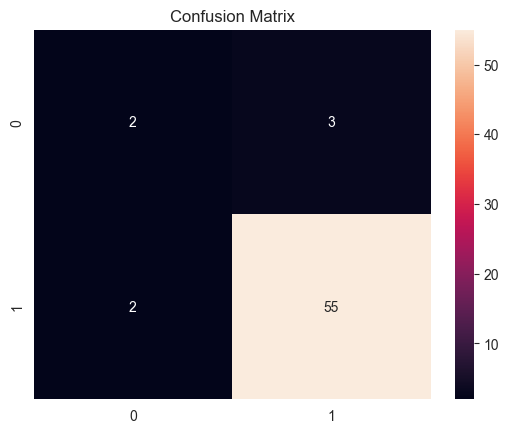

In [36]:
print("Naive Bayes:")
nb = GaussianNB()
evaluate_model(nb, X_train_res, y_train_res, X_test, y_test)

## Hyperparameter Tuning

Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': None}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0
Cross-validation Score: 0.929559748427673


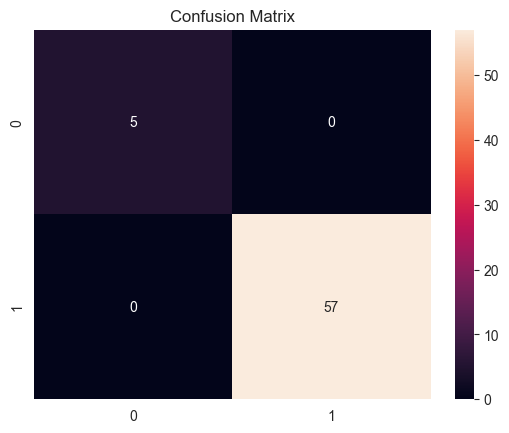

In [37]:

# Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='recall', n_jobs=-1)
grid_search_dt.fit(X_train_res, y_train_res)

print("Best parameters for Decision Tree: ", grid_search_dt.best_params_)
evaluate_model(grid_search_dt, X_train_res, y_train_res, X_test, y_test)

Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 50}
Accuracy: 0.9354838709677419
Precision: 0.9818181818181818
Recall: 0.9473684210526315
F1 Score: 0.9642857142857142
ROC-AUC Score: 0.8736842105263157
Cross-validation Score: 0.9110412299091545


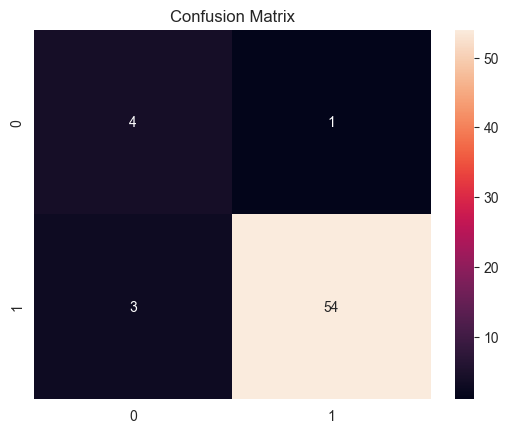

In [38]:
# Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='recall', n_jobs=-1)
grid_search_rf.fit(X_train_res, y_train_res)

print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
evaluate_model(grid_search_rf, X_train_res, y_train_res, X_test, y_test)

In [ ]:
# Support Vector Machine
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5],
    'shrinking': [True, False],
    'probability': [True, False],
    'tol': [1e-3, 1e-4, 1e-5]
}
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='recall', n_jobs=-1)
grid_search_svc.fit(X_train_res, y_train_res)

print("Best parameters for Support Vector Machine: ", grid_search_svc.best_params_)
evaluate_model(grid_search_svc, X_train_res, y_train_res, X_test, y_test)